# SWOT data viz


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## By Reach

#### Load / base filter SWOT data

In [2]:
# Read the csv from hydrochron pull
SWOT_full_df = pd.read_csv('/Users/camryn/Documents/Duke/courses/geospatial_data_analysis/SWOTson_River_Camryn/Watson_reach_df.csv')

# Remove duplicates based on reach_id, time, and wse (will filter for NaNs)
SWOT_df = SWOT_full_df.drop_duplicates(subset=['reach_id', 'time', 'wse'], keep='first')

# Base filter SWOT data
SWOT_df_filtered = SWOT_df[
    #(SWOT_df['reach_q'] < 2) &
    (SWOT_df['xtrk_dist'].abs() >= 10000) & # SWOT values are only valid from 10-60km cross track
    (SWOT_df['xtrk_dist'].abs() <= 60000) &
    (SWOT_df['partial_f'] == 0) & # only keep reaches that have >50% swath coverage
    (SWOT_df['wse'] > 0) # another NaN check
    # Potential additional filters:
    # & (SWOT_df['dark_frac'] <= 50) # dark water
    # & (SWOT_df['wse_u'] <= 0.5) # wse uncertainty
]


In [7]:
SWOT_df_filtered['reach_id'].unique()

array([91270800031, 91270800041, 91270800051])

In [8]:
SWOT_df_filtered.head()

,reach_id,time,time_tai,time_str,p_lat,p_lon,wse,wse_u,wse_r_u,slope,...,area_tot_u_units,area_detct_units,area_det_u_units,area_wse_units,layovr_val_units,node_dist_units,xtrk_dist_units,dark_frac_units,p_dist_out_units,n_good_nod_units
8,91270800031,7.698076e+08,7.698076e+08,2024-05-23T19:26:51Z,67.026229,-50.585435,37.1611,0.54209,0.53457,0.007997,...,m^2,m^2,m^2,m^2,m,m,m,1,m,1
9,91270800031,7.702082e+08,7.702083e+08,2024-05-28T10:43:36Z,67.026229,-50.585435,35.7545,0.55259,0.54521,0.006235,...,m^2,m^2,m^2,m^2,m,m,m,1,m,1
10,91270800031,7.702947e+08,7.702947e+08,2024-05-29T10:44:17Z,67.026229,-50.585435,34.9826,0.29985,0.28602,0.006078,...,m^2,m^2,m^2,m^2,m,m,m,1,m,1
11,91270800031,7.706657e+08,7.706658e+08,2024-06-02T17:49:09Z,67.026229,-50.585435,45.9580,0.50719,0.49914,0.004178,...,m^2,m^2,m^2,m^2,m,m,m,1,m,1
16,91270800031,7.716103e+08,7.716104e+08,2024-06-13T16:11:57Z,67.026229,-50.585435,37.5054,0.47876,0.47023,0.008687,...,m^2,m^2,m^2,m^2,m,m,m,1,m,1


In [4]:
# save filtered df
SWOT_df_filtered.to_csv("/Users/camryn/Documents/Duke/courses/geospatial_data_analysis/SWOTson_River/data/Watson_filtered_reach_df.csv", index=False)

In [3]:
# df checks / exploration

# total filtered obs count
print("Data retention:", len(SWOT_df_filtered)/len(SWOT_full_df))
print("Data retention post nan filter:", len(SWOT_df_filtered)/len(SWOT_df))

# col names
print(SWOT_df_filtered.columns.tolist())

Data retention: 0.40875912408759124
Data retention post nan filter: 0.5137614678899083
['reach_id', 'time', 'time_tai', 'time_str', 'p_lat', 'p_lon', 'wse', 'wse_u', 'wse_r_u', 'slope', 'slope_u', 'slope_r_u', 'slope2', 'slope2_u', 'slope2_r_u', 'width', 'width_u', 'area_total', 'area_tot_u', 'area_detct', 'area_det_u', 'area_wse', 'layovr_val', 'node_dist', 'xtrk_dist', 'reach_q', 'reach_q_b', 'dark_frac', 'xovr_cal_q', 'cycle_id', 'pass_id', 'sword_version', 'p_dist_out', 'partial_f', 'n_good_nod', 'time_units', 'time_tai_units', 'p_lat_units', 'p_lon_units', 'wse_units', 'wse_u_units', 'wse_r_u_units', 'slope_units', 'slope_u_units', 'slope_r_u_units', 'slope2_units', 'slope2_u_units', 'slope2_r_u_units', 'width_units', 'width_u_units', 'area_total_units', 'area_tot_u_units', 'area_detct_units', 'area_det_u_units', 'area_wse_units', 'layovr_val_units', 'node_dist_units', 'xtrk_dist_units', 'dark_frac_units', 'p_dist_out_units', 'n_good_nod_units']


##### Timeseries plots

/var/folders/tz/g_8hxmvd0cb8yd6lk9pv5b500000gn/T/ipykernel_95079/936276300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SWOT_df_filtered['time_str'] = pd.to_datetime(SWOT_df_filtered['time_str'])


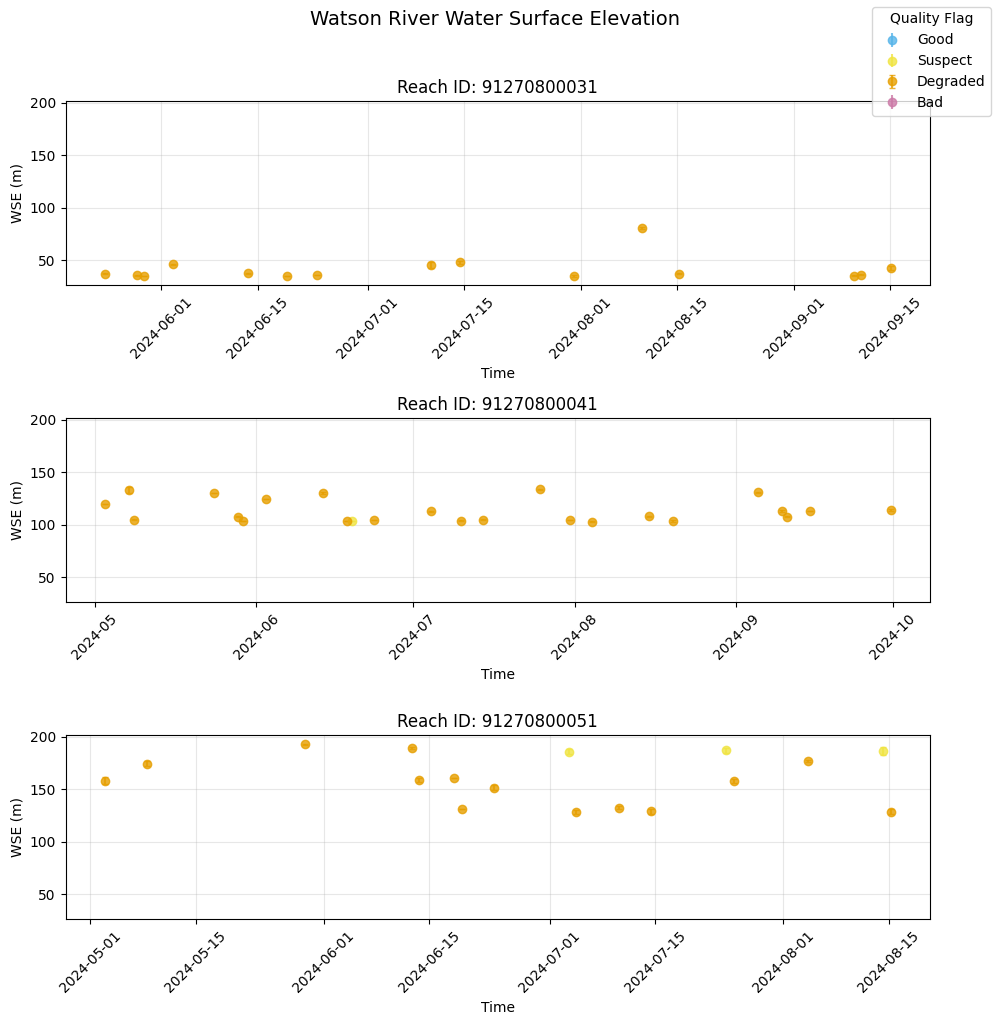

In [22]:
# WSE plot

# time_str to datetime and sort globally
SWOT_df_filtered['time_str'] = pd.to_datetime(SWOT_df_filtered['time_str'])

# Define colormap for quality flags
quality_labels = {0: 'Good', 1: 'Suspect', 2: 'Degraded', 3: 'Bad'}
quality_colors = {0: '#56B4E9', 1: '#F0E442', 2: '#E69F00', 3: '#CC79A7'}

# get reach ids (hardcoded for 3 reaches)
reach_ids = SWOT_df_filtered['reach_id'].unique()[:3]

# plot
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharey=True)

for i, reach in enumerate(reach_ids):
    ax = axes[i]
    reach_data = SWOT_df_filtered[SWOT_df_filtered['reach_id'] == reach]
    
    # Plot by quality flag
    for q_val, label in quality_labels.items():
        subset = reach_data[reach_data['reach_q'] == q_val]
        ax.errorbar(
            subset['time_str'],
            subset['wse'],
            yerr=subset['wse_u'],
            fmt='o',
            color=quality_colors[q_val],
            label=label if i == 0 else None,  # show legend just on the first plot
            alpha=0.8,
            capsize=2
        )

    ax.set_title(f"Reach ID: {reach}")
    ax.set_xlabel("Time")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel("WSE (m)")
axes[1].set_ylabel("WSE (m)")
axes[2].set_ylabel("WSE (m)")
fig.legend(title="Quality Flag", loc="upper right")
fig.suptitle("Watson River Water Surface Elevation", fontsize=14, y=1.02)
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()


/var/folders/tz/g_8hxmvd0cb8yd6lk9pv5b500000gn/T/ipykernel_95079/2265694297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SWOT_df_filtered['time_str'] = pd.to_datetime(SWOT_df_filtered['time_str'])


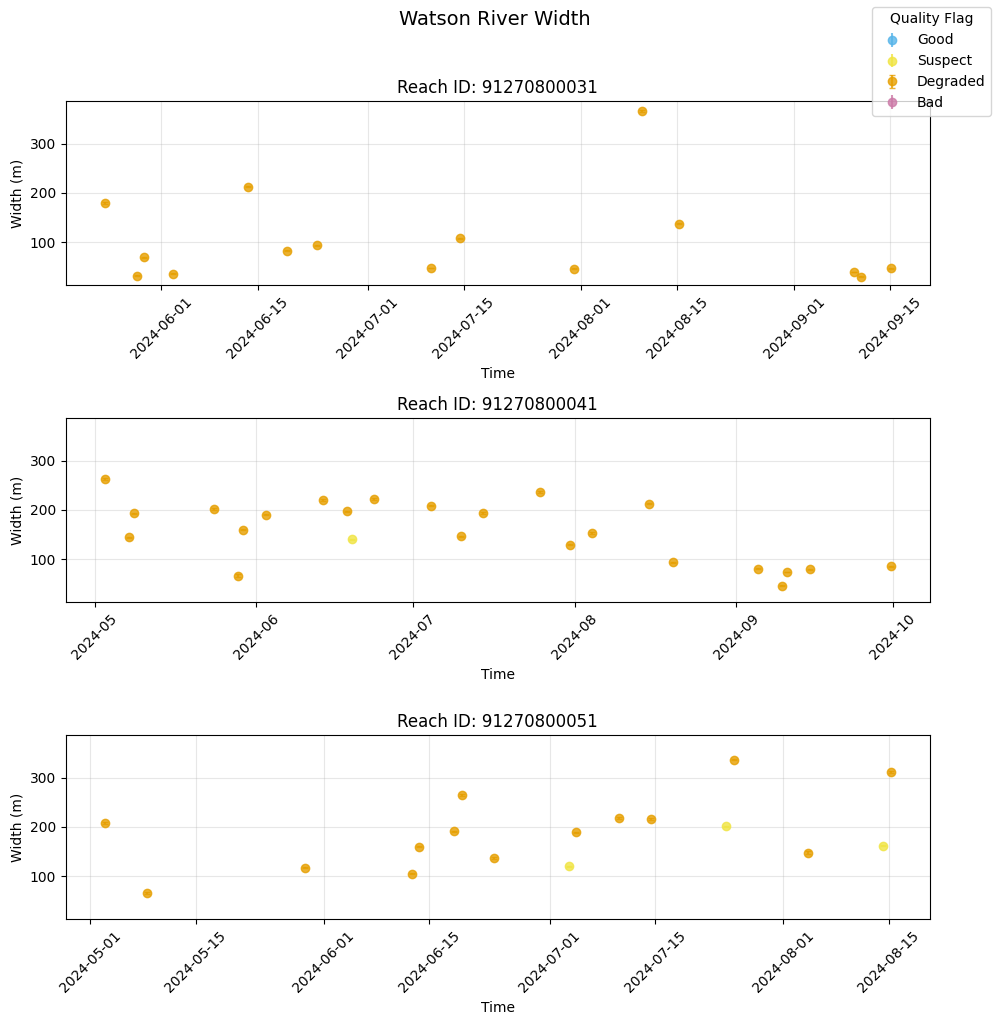

In [23]:
# WSE plot

# time_str to datetime and sort globally
SWOT_df_filtered['time_str'] = pd.to_datetime(SWOT_df_filtered['time_str'])

# Define colormap for quality flags
quality_labels = {0: 'Good', 1: 'Suspect', 2: 'Degraded', 3: 'Bad'}
quality_colors = {0: '#56B4E9', 1: '#F0E442', 2: '#E69F00', 3: '#CC79A7'}

# get reach ids (hardcoded for 3 reaches)
reach_ids = SWOT_df_filtered['reach_id'].unique()[:3]

# plot
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharey=True)

for i, reach in enumerate(reach_ids):
    ax = axes[i]
    reach_data = SWOT_df_filtered[SWOT_df_filtered['reach_id'] == reach]
    
    # Plot by quality flag
    for q_val, label in quality_labels.items():
        subset = reach_data[reach_data['reach_q'] == q_val]
        ax.errorbar(
            subset['time_str'],
            subset['width'],
            yerr=subset['width_u'],
            fmt='o',
            color=quality_colors[q_val],
            label=label if i == 0 else None,  # show legend just on the first plot
            alpha=0.8,
            capsize=2
        )

    ax.set_title(f"Reach ID: {reach}")
    ax.set_xlabel("Time")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel("Width (m)")
axes[1].set_ylabel("Width (m)")
axes[2].set_ylabel("Width (m)")
fig.legend(title="Quality Flag", loc="upper right")
fig.suptitle("Watson River Width", fontsize=14, y=1.02)
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()


## By Node

In [9]:
# Read the csv from hydrochron pull
SWOT_full_df = pd.read_csv('/Users/camryn/Documents/Duke/courses/geospatial_data_analysis/SWOTson_River_Camryn/Watson_node_df.csv')

# Remove duplicates based on reach_id, time, and wse (will filter for NaNs)
SWOT_df = SWOT_full_df.drop_duplicates(subset=['reach_id', 'time', 'wse'], keep='first')

# Base filter SWOT data
SWOT_df_filtered = SWOT_df[
    #(SWOT_df['reach_q'] < 2) &
    (SWOT_df['xtrk_dist'].abs() >= 10000) & # SWOT values are only valid from 10-60km cross track
    (SWOT_df['xtrk_dist'].abs() <= 60000) &
    (SWOT_df['wse'] > 0) # another NaN check
    # Potential additional filters:
    # & (SWOT_df['dark_frac'] <= 50) # dark water
    # & (SWOT_df['wse_u'] <= 0.5) # wse uncertainty
]


In [11]:
len(SWOT_df_filtered['node_id'].unique())

125

In [24]:
# Base filter SWOT data
SWOT_node_912708000050221 = SWOT_df_filtered[
    (SWOT_df['node_id'] == 91270800050221) &
    (SWOT_df['xtrk_dist'].abs() >= 10000) & # SWOT values are only valid from 10-60km cross track
    (SWOT_df['xtrk_dist'].abs() <= 60000) &
    (SWOT_df['wse'] > 0)]

/var/folders/tz/g_8hxmvd0cb8yd6lk9pv5b500000gn/T/ipykernel_71106/4199935348.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SWOT_node_912708000050221 = SWOT_df_filtered[


In [26]:
SWOT_node_912708000050221.head(30)

,reach_id,node_id,time,time_str,time_tai,lat,lon,wse,wse_u,wse_r_u,...,area_det_u_units,area_wse_units,layovr_val_units,node_dist_units,xtrk_dist_units,dark_frac_units,n_good_pix_units,rdr_sig0_units,p_dist_out_units,p_length_units
4830,91270800051,91270800050221,7.679185e+08,2024-05-01 22:41:05+00:00,7.679185e+08,67.068871,-50.258584,185.87456,0.63347,0.62704,...,m^2,m^2,m,m,m,1,1,1,m,m
4831,91270800051,91270800050221,7.680049e+08,2024-05-02 22:41:46+00:00,7.680049e+08,67.070685,-50.258600,154.61850,0.38812,0.37754,...,m^2,m^2,m,m,m,1,1,1,m,m
4833,91270800051,91270800050221,7.684920e+08,2024-05-08 13:59:21+00:00,7.684920e+08,67.074855,-50.256504,170.81022,0.12159,0.08175,...,m^2,m^2,m,m,m,1,1,1,m,m
4836,91270800051,91270800050221,7.697212e+08,2024-05-22 19:26:10+00:00,7.697212e+08,67.069009,-50.258481,185.35464,0.26880,0.25328,...,m^2,m^2,m,m,m,1,1,1,m,m
4839,91270800051,91270800050221,7.702947e+08,2024-05-29 10:44:26+00:00,7.702947e+08,67.066666,-50.256863,209.38691,0.27840,0.26346,...,m^2,m^2,m,m,m,1,1,1,m,m
4842,91270800051,91270800050221,7.711528e+08,2024-06-08 09:06:34+00:00,7.711528e+08,67.070027,-50.257994,186.76373,0.09253,0.02149,...,m^2,m^2,m,m,m,1,1,1,m,m
4843,91270800051,91270800050221,7.715239e+08,2024-06-12 16:11:16+00:00,7.715239e+08,67.065374,-50.258356,185.57649,0.14844,0.11804,...,m^2,m^2,m,m,m,1,1,1,m,m
4844,91270800051,91270800050221,7.716103e+08,2024-06-13 16:11:57+00:00,7.716104e+08,67.071735,-50.257191,156.98319,0.10746,0.05872,...,m^2,m^2,m,m,m,1,1,1,m,m
4845,91270800051,91270800050221,7.720109e+08,2024-06-18 07:28:50+00:00,7.720110e+08,67.072286,-50.256735,174.93354,0.09854,0.04013,...,m^2,m^2,m,m,m,1,1,1,m,m
4846,91270800051,91270800050221,7.720974e+08,2024-06-19 07:29:31+00:00,7.720974e+08,67.072452,-50.256614,135.50838,0.09291,0.02307,...,m^2,m^2,m,m,m,1,1,1,m,m


In [27]:
# save filtered df
SWOT_node_912708000050221.to_csv("/Users/camryn/Documents/Duke/courses/geospatial_data_analysis/SWOTson_River/data/SWOT_node_912708000050221.csv", index=False)

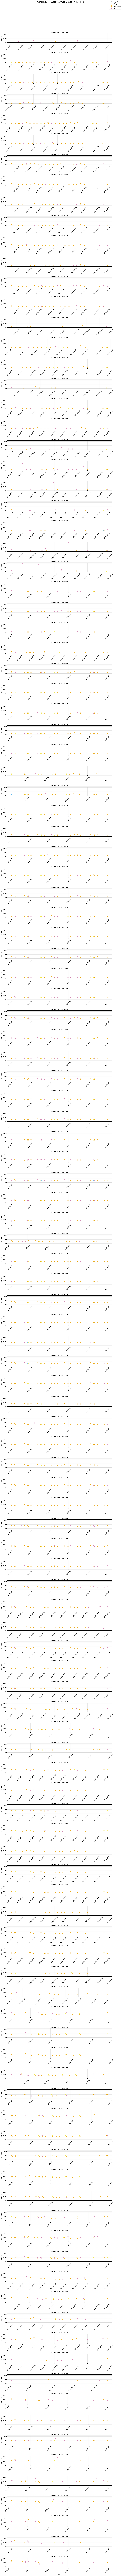

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure proper datetime and sorting
SWOT_df_filtered['time_str'] = pd.to_datetime(SWOT_df_filtered['time_str'])
SWOT_df_filtered = SWOT_df_filtered.sort_values('time_str')

# Define colormap for quality flags
quality_labels = {0: 'Good', 1: 'Suspect', 2: 'Degraded', 3: 'Bad'}
quality_colors = {0: '#56B4E9', 1: '#F0E442', 2: '#E69F00', 3: '#CC79A7'}

# Get unique node IDs (sorted for consistency)
node_ids = sorted(SWOT_df_filtered['node_id'].unique())

# Create subplots dynamically
n_nodes = len(node_ids)
fig, axes = plt.subplots(n_nodes, 1, figsize=(12, n_nodes * 2), sharey=True)

# If there’s only one node, axes won’t be iterable
if n_nodes == 1:
    axes = [axes]

for i, node in enumerate(node_ids):
    ax = axes[i]
    node_data = SWOT_df_filtered[SWOT_df_filtered['node_id'] == node]

    # Plot WSE by quality flag
    for q_val, label in quality_labels.items():
        subset = node_data[node_data['node_q'] == q_val]
        if not subset.empty:
            ax.errorbar(
                subset['time_str'],
                subset['wse'],
                yerr=subset['wse_u'],
                fmt='o',
                color=quality_colors[q_val],
                label=label if i == 0 else None,  # legend only once
                alpha=0.8,
                capsize=2
            )

    ax.set_title(f"Node ID: {node}", fontsize=9)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)
    ax.set_ylabel("WSE (m)")

axes[-1].set_xlabel("Time")

fig.legend(title="Quality Flag", loc="upper right")
fig.suptitle("Watson River Water Surface Elevation by Node", fontsize=14, y=1.01)
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()
